In [64]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import time
import matplotlib.pyplot as plt

In [2]:
age_df = pd.read_csv("section data/demographic data/age_2009_2020.csv")

In [3]:
age_df.head()

,GEOID,district,state,year,age,estimate,moe
0,101,1,Alabama,2009,20_29,0.191130,0.007602
1,101,1,Alabama,2009,30_44,0.272672,0.007510
2,101,1,Alabama,2009,45_64,0.364656,0.009068
3,101,1,Alabama,2009,65+,0.171542,0.010516
4,101,1,Alabama,2010,20_29,0.181469,0.007655


In [4]:
race_df = pd.read_csv("section data/demographic data/race_2009_2020.csv")
race_df.head()

,GEOID,district,state,year,race,estimate,moe
0,101,1,Alabama,2009,white,0.670510,0.000990354
1,101,1,Alabama,2009,black,0.276228,0.001153418
2,101,1,Alabama,2009,native american,0.009652,0.000679185
3,101,1,Alabama,2009,asian,0.013528,0.000549033
4,101,1,Alabama,2009,pacific islander,0.000251,0.000252824


In [5]:
sex_df = pd.read_csv("section data/demographic data/sex_2009_2020.csv")
sex_df.head()

,GEOID,district,state,year,sex,estimate,moe
0,101,1,Alabama,2009,male,0.472561,0.016396
1,101,1,Alabama,2009,female,0.527439,0.017375
2,101,1,Alabama,2010,male,0.475661,0.017193
3,101,1,Alabama,2010,female,0.524339,0.017749
4,101,1,Alabama,2011,male,0.475751,0.017073


In [6]:
demographic_df = pd.read_csv("section data/demographic data/demographic_2009_2020.csv")
demographic_df.head()

,Unnamed: 0,st_cd_fips,district,state,year,male,female,20_29,30_44,45_64,65+,white,black,native american,asian,pacific islander,other,mixed,hispanic or latino
0,1,101,1,Alabama,2009,0.472561,0.527439,0.191130,0.272672,0.364656,0.171542,0.670510,0.276228,0.009652,0.013528,0.000251,0.000881,0.009767,0.019182
1,2,101,1,Alabama,2010,0.475661,0.524339,0.181469,0.270285,0.374180,0.174067,0.662803,0.275794,0.010974,0.013117,0.000232,0.000817,0.011338,0.024925
2,3,101,1,Alabama,2011,0.475751,0.524249,0.180968,0.266883,0.375792,0.176357,0.660254,0.276152,0.010987,0.013324,0.000085,0.000803,0.011956,0.026439
3,4,101,1,Alabama,2012,0.475539,0.524461,0.181161,0.264336,0.374897,0.179606,0.658844,0.276163,0.010755,0.013900,0.000132,0.000533,0.011848,0.027825
4,5,101,1,Alabama,2013,0.475549,0.524451,0.181076,0.262379,0.373420,0.183124,0.657227,0.276436,0.010167,0.013855,0.000095,0.000393,0.013056,0.028772


In [7]:
dem_numeric = demographic_df.iloc[:, 5:]
dem_numeric

,male,female,20_29,30_44,45_64,65+,white,black,native american,asian,pacific islander,other,mixed,hispanic or latino
0,0.472561,0.527439,0.191130,0.272672,0.364656,0.171542,0.670510,0.276228,0.009652,0.013528,0.000251,0.000881,0.009767,0.019182
1,0.475661,0.524339,0.181469,0.270285,0.374180,0.174067,0.662803,0.275794,0.010974,0.013117,0.000232,0.000817,0.011338,0.024925
2,0.475751,0.524249,0.180968,0.266883,0.375792,0.176357,0.660254,0.276152,0.010987,0.013324,0.000085,0.000803,0.011956,0.026439
3,0.475539,0.524461,0.181161,0.264336,0.374897,0.179606,0.658844,0.276163,0.010755,0.013900,0.000132,0.000533,0.011848,0.027825
4,0.475549,0.524451,0.181076,0.262379,0.373420,0.183124,0.657227,0.276436,0.010167,0.013855,0.000095,0.000393,0.013056,0.028772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.507977,0.492023,0.201057,0.265712,0.357997,0.175234,0.843627,0.010593,0.019637,0.008974,0.000520,0.000257,0.019680,0.096712
5192,0.508944,0.491056,0.198444,0.266655,0.351665,0.183236,0.842980,0.009930,0.020535,0.008428,0.000640,0.000357,0.019942,0.097190
5193,0.508175,0.491825,0.193549,0.267474,0.347702,0.191275,0.841404,0.008850,0.021857,0.008009,0.000746,0.000390,0.020837,0.097907
5194,0.507424,0.492576,0.190812,0.266766,0.341913,0.200509,0.840649,0.008938,0.021595,0.008445,0.000792,0.000375,0.020517,0.098690


In [8]:
# This function creates a table which contains the cosine similarity between each pair of rows in a dataframe

def cosine_similarity_table(df):
    # Create a table of cosine similarities between each pair of rows
    similarity_table = cosine_similarity(df)
    # Create a dataframe from the table
    similarity_table_df = pd.DataFrame(similarity_table)
    # Set the index and column names to be the same as the original dataframe
    similarity_table_df.index = df.index
    similarity_table_df.columns = df.index
    return similarity_table_df

In [9]:
cosine_similarity_table(dem_numeric)

,0,1,2,3,4,5,6,7,8,9,...,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195
0,1.000000,0.999884,0.999828,0.999792,0.999742,0.999642,0.999537,0.999383,0.999194,0.998948,...,0.961890,0.962299,0.962601,0.962938,0.963059,0.963055,0.962742,0.962463,0.962222,0.961788
1,0.999884,1.000000,0.999989,0.999967,0.999929,0.999842,0.999724,0.999551,0.999378,0.999140,...,0.961392,0.961827,0.962137,0.962454,0.962559,0.962559,0.962240,0.961987,0.961743,0.961342
2,0.999828,0.999989,1.000000,0.999992,0.999968,0.999898,0.999796,0.999636,0.999477,0.999257,...,0.961075,0.961515,0.961825,0.962146,0.962257,0.962259,0.961944,0.961702,0.961469,0.961086
3,0.999792,0.999967,0.999992,1.000000,0.999991,0.999944,0.999865,0.999728,0.999591,0.999395,...,0.960912,0.961363,0.961682,0.962021,0.962150,0.962165,0.961870,0.961647,0.961442,0.961088
4,0.999742,0.999929,0.999968,0.999991,1.000000,0.999979,0.999923,0.999813,0.999696,0.999524,...,0.960638,0.961104,0.961435,0.961794,0.961947,0.961979,0.961709,0.961511,0.961337,0.961023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.963055,0.962559,0.962259,0.962165,0.961979,0.961828,0.961464,0.961508,0.961425,0.961341,...,0.999476,0.999680,0.999804,0.999910,0.999978,1.000000,0.999962,0.999855,0.999661,0.999320
5192,0.962742,0.962240,0.961944,0.961870,0.961709,0.961600,0.961274,0.961370,0.961327,0.961285,...,0.999200,0.999443,0.999606,0.999760,0.999882,0.999962,1.000000,0.999963,0.999846,0.999594
5193,0.962463,0.961987,0.961702,0.961647,0.961511,0.961446,0.961149,0.961290,0.961289,0.961288,...,0.998884,0.999166,0.999362,0.999553,0.999724,0.999855,0.999963,1.000000,0.999957,0.999795
5194,0.962222,0.961743,0.961469,0.961442,0.961337,0.961323,0.961071,0.961271,0.961318,0.961370,...,0.998453,0.998773,0.999004,0.999246,0.999473,0.999661,0.999846,0.999957,1.000000,0.999933


In [10]:
# This function returns a table where each row contains the indices of the 5 most similar rows in the dataframe

def most_similar_rows(df):
    import pandas as pd
    import numpy as np
    # Create a table of cosine similarities between each pair of rows
    similarity_table = cosine_similarity_table(df)
    # Create a table where each row contains the indices of the 5 most similar rows
    most_similar_table = similarity_table.apply(lambda x: np.argsort(x)[-6:-1], axis=1)
    # Create a dataframe from the table
    most_similar_table_df = pd.DataFrame(most_similar_table)
    # Set the index and column names to be the same as the original dataframe
    most_similar_table_df.index = df.index
    most_similar_table_df.columns = ["Most similar row 1", "Most similar row 2", "Most similar row 3", "Most similar row 4", "Most similar row 5"]
    return most_similar_table_df

In [11]:
most_similar_rows(dem_numeric)

,Most similar row 1,Most similar row 2,Most similar row 3,Most similar row 4,Most similar row 5
0,2648,2650,2649,2,1
1,5,0,4,3,2
2,4177,5,4,1,3
3,6,5,1,4,2
4,6,1,2,5,3
...,...,...,...,...,...
5191,5188,5193,5189,5192,5190
5192,5189,5194,5190,5191,5193
5193,5190,5195,5191,5194,5192
5194,1554,1555,5192,5195,5193


In [18]:
# This function takes in a row and a table, and returns the 5 rows in the table which is most similar to the input row

def most_similar_rows_to_row(row, df):
    
    similarity_df = cosine_similarity(row, df)
    similarity_df = pd.DataFrame(similarity_df)
    similarity_df.index = df.index
    similarity_df.columns = ["Similarity"]
    similarity_df = similarity_df.sort_values(by="Similarity", ascending=False)
    return similarity_df.iloc[1:6, :]

In [39]:
# This functions uses the New York Times API to get the number of articles published in 2022 with a given search term

# Path: Week 7/week7_py.ipynb
import requests
import json

def get_nyt_articles(search_term):
    url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
    params = {"api-key": "YOUR-API-KEY", "q": search_term, "begin_date": "20220101", "end_date": "20221231"}
    response = requests.get(url, params=params)
    data = response.json()
    return data["response"]["meta"]["hits"]

In [40]:
# This function uses the New York Times API to get a table of articles published in 2022 with a given search term

from math import floor

def get_nyt_articles_table(search_term):
    num_hits = get_nyt_articles(search_term)

    max_pages = floor(num_hits / 10)

    all_dates = []

    for i in range(0, max_pages+1):
        time.sleep(6)
        url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
        params = {"api-key": "YOUR-API-KEY", "q": search_term, "begin_date": "20220101", "end_date": "20221231", "page":i}
        response = requests.get(url, params=params)
        data = response.json()
        arts = pd.DataFrame(data["response"]["docs"])
        all_dates.append(arts["pub_date"])

    return all_dates
         


In [41]:
all_dates = get_nyt_articles_table("mar-a-lago")

In [60]:
pd.to_datetime(pd.concat(all_dates)).to_csv("article_dates.csv")

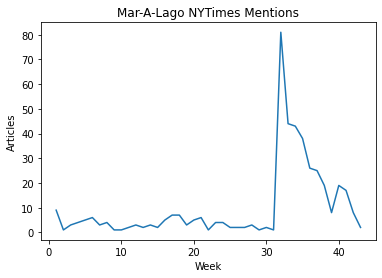

In [72]:
pd.to_datetime(pd.concat(all_dates)).sort_values().dt.isocalendar().week.value_counts().sort_index().plot(title="Mar-A-Lago NYTimes Mentions", xlabel="Week", ylabel="Articles")
plt.savefig("nyt_mal.png")

In [65]:
generic_ballot_df = pd.read_csv("538_generic_ballot_averages_2018-2022.csv")
generic_ballot_df.head()
generic_ballot_df["date"] = pd.to_datetime(generic_ballot_df["date"])
generic_2022 = generic_ballot_df[generic_ballot_df["date"].dt.year == 2022]
generic_2022["week"] = generic_2022["date"].dt.week
generic_2022 = generic_2022[generic_2022["week"] != 52]
data = generic_2022.groupby(["week", "candidate"])["pct_estimate"].mean().reset_index()

<ipython-input-65-c5e145ee1a02>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  generic_2022["week"] = generic_2022["date"].dt.week
<ipython-input-65-c5e145ee1a02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generic_2022["week"] = generic_2022["date"].dt.week


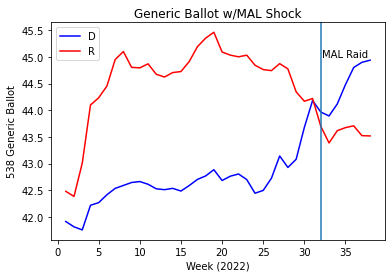

In [74]:
plt.plot("week", "pct_estimate", data=data[data["candidate"] == "Democrats"], label="D", color="blue")
plt.plot("week", "pct_estimate", data=data[data["candidate"] == "Republicans"], label="R", color="red")
plt.axvline(32)
plt.text(32.1, 45, 'MAL Raid')
plt.legend()
plt.title("Generic Ballot w/MAL Shock")
plt.xlabel("Week (2022)")
plt.ylabel("538 Generic Ballot")
plt.savefig("generic_bal_mal.png")

In [12]:
# # This functions uses the New York Times API to get the number of articles published in 2022 with a given search term

# # Path: Week 7/week7_py.ipynb
# import requests
# import json

# def get_nyt_articles(search_term):
#     url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
#     params = {"api-key": "YOUR API KEY", "q": search_term, "begin_date": "20220101", "end_date": "20221231"}
#     response = requests.get(url, params=params)
#     data = response.json()
#     return data["response"]["meta"]["hits"]

In [35]:
# search_term = "mar-a-lago"
# facet_field = "day_of_week"
# facet = "true"
# begin_date = "20220101"
# end_date = "20221024"
# api_key = "YOUR-API-KEY"
# complete_url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?fq={search_term}&facet_field={facet_field}&facet={facet}&begin_date={begin_date}&end_date={end_date}&api-key={api_key}"

In [20]:
# import requests

In [36]:
# resp = requests.get(complete_url).json()

In [37]:
# resp["response"]["meta"]["hits"]

741

In [38]:
# pd.DataFrame(resp["response"]['docs'])["pub_date"]

0    2022-01-06T08:00:15+0000
1    2022-09-07T07:01:25+0000
2    2022-09-17T19:32:23+0000
3    2022-08-09T18:20:03+0000
4    2022-09-17T12:10:12+0000
5    2022-05-25T09:00:12+0000
6    2022-04-02T18:04:40+0000
7    2022-08-26T23:00:07+0000
8    2022-08-23T05:05:09+0000
9    2022-10-11T23:00:06+0000
Name: pub_date, dtype: object